In [2]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
def Test_show(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,20,80,80)
    I_blur_bilateralFilter = 255 - blur_bilateralFilter
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(I_blur_bilateralFilter)
    
    plt.show()
    
def Test_get(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,20,80,80)
    I_blur_bilateralFilter = 255 - blur_bilateralFilter
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(I_blur_bilateralFilter)
    
    plt.show()
    
    return [img,blur_bilateralFilter,I_blur_bilateralFilter]

def Test_get_2(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#     b,g,r = cv2.split(img)
#     img_2 = cv2.merge([r,g,b])
    
    blur_bilateralFilter = cv2.bilateralFilter(img,10,80,80)
    re_blur_bilateralFilter = cv2.bilateralFilter(blur_bilateralFilter,10,80,80)
    
    f, axes = plt.subplots(1, 3)
    f.set_size_inches((20, 6))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    
    axes[0].imshow(img)
    axes[1].imshow(blur_bilateralFilter)
    axes[2].imshow(re_blur_bilateralFilter)
    
    plt.show()
    
    return [img,blur_bilateralFilter,re_blur_bilateralFilter]

def GaussianBlur(img,ksize):
    blur = cv2.GaussianBlur(img,ksize=(ksize,ksize),sigmaX=0)
    edged  = cv2.Canny(blur,10,250)
    return edged


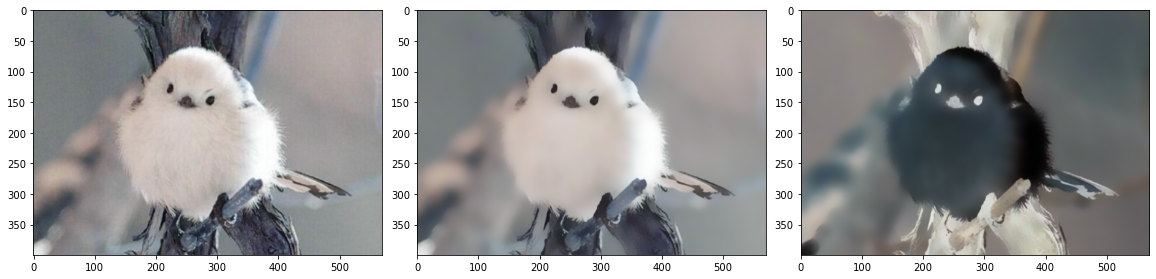

In [3]:
Test_show('C:/Users/admin/Downloads/QuteBird.jpg')

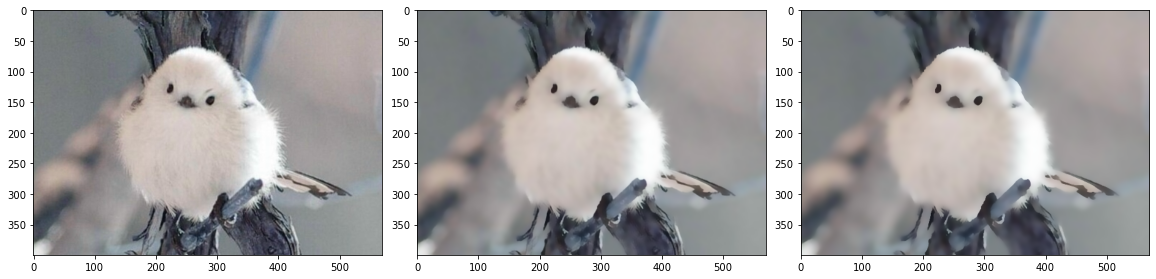

In [4]:
a = Test_get_2('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')

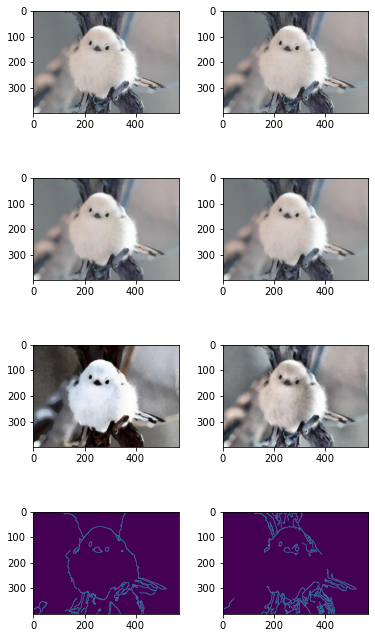

In [5]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)


# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_rgb = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

# 이미지 타일별 히스토그램 균일화
lab = cv2.cvtColor(median, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
limg = cv2.merge([cl,a,b])
enhanced_tile = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)






f, axes = plt.subplots(4, 2)
f.set_size_inches((6, 12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_rgb)
axes[3,0].imshow(GaussianBlur(enhanced_rgb,1))



axes[0,1].imshow(origin)
axes[1,1].imshow(median)
axes[2,1].imshow(enhanced_tile)
axes[3,1].imshow(GaussianBlur(enhanced_tile,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

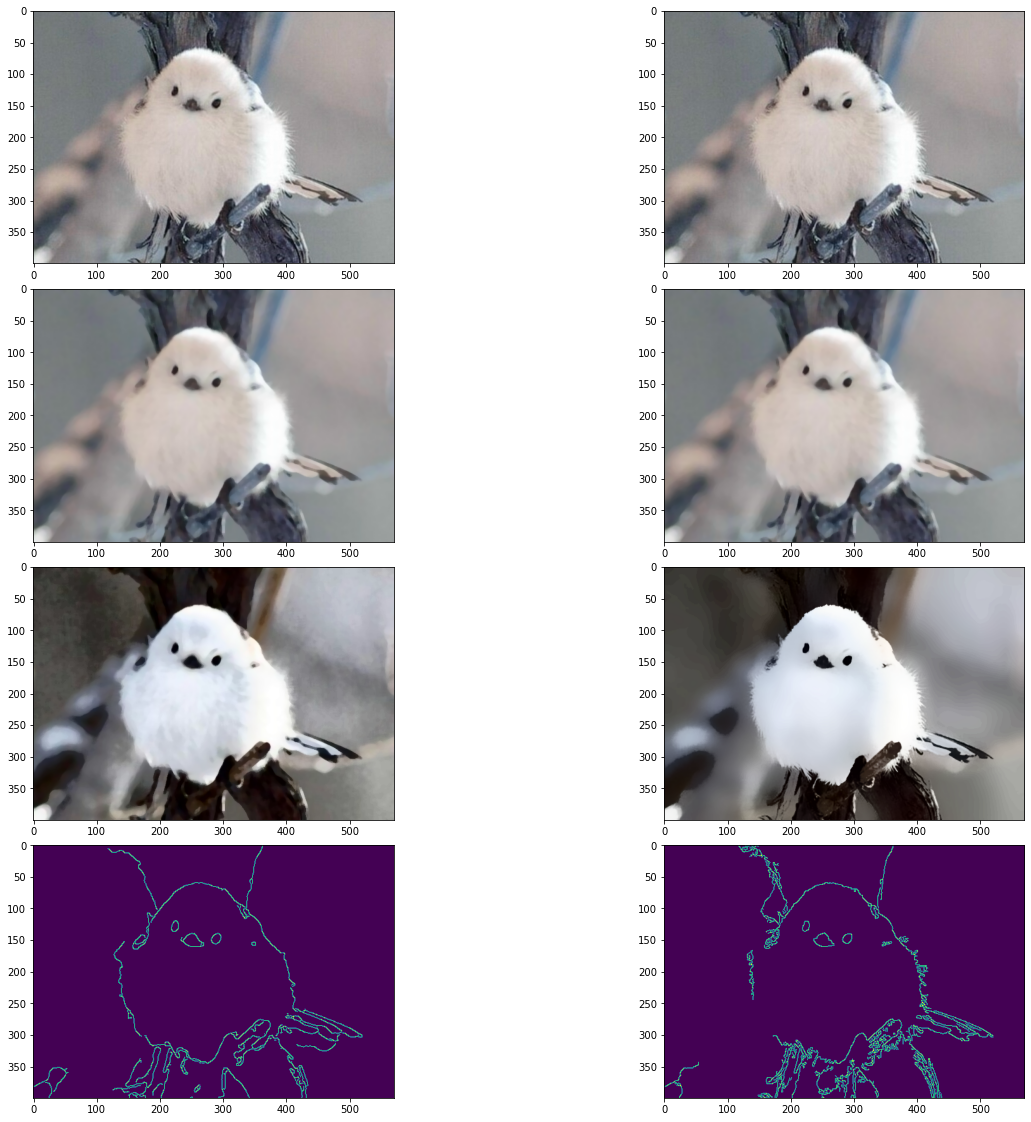

In [53]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
bilateral = cv2.bilateralFilter(origin,40,80,80)

# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

enhanced_yuv = cv2.cvtColor(bilateral, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_bilateral = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)



f, axes = plt.subplots(4, 2)
f.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_median)
axes[3,0].imshow(GaussianBlur(enhanced_median,1))



axes[0,1].imshow(origin)
axes[1,1].imshow(median)
axes[2,1].imshow(enhanced_bilateral)
axes[3,1].imshow(GaussianBlur(enhanced_bilateral,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

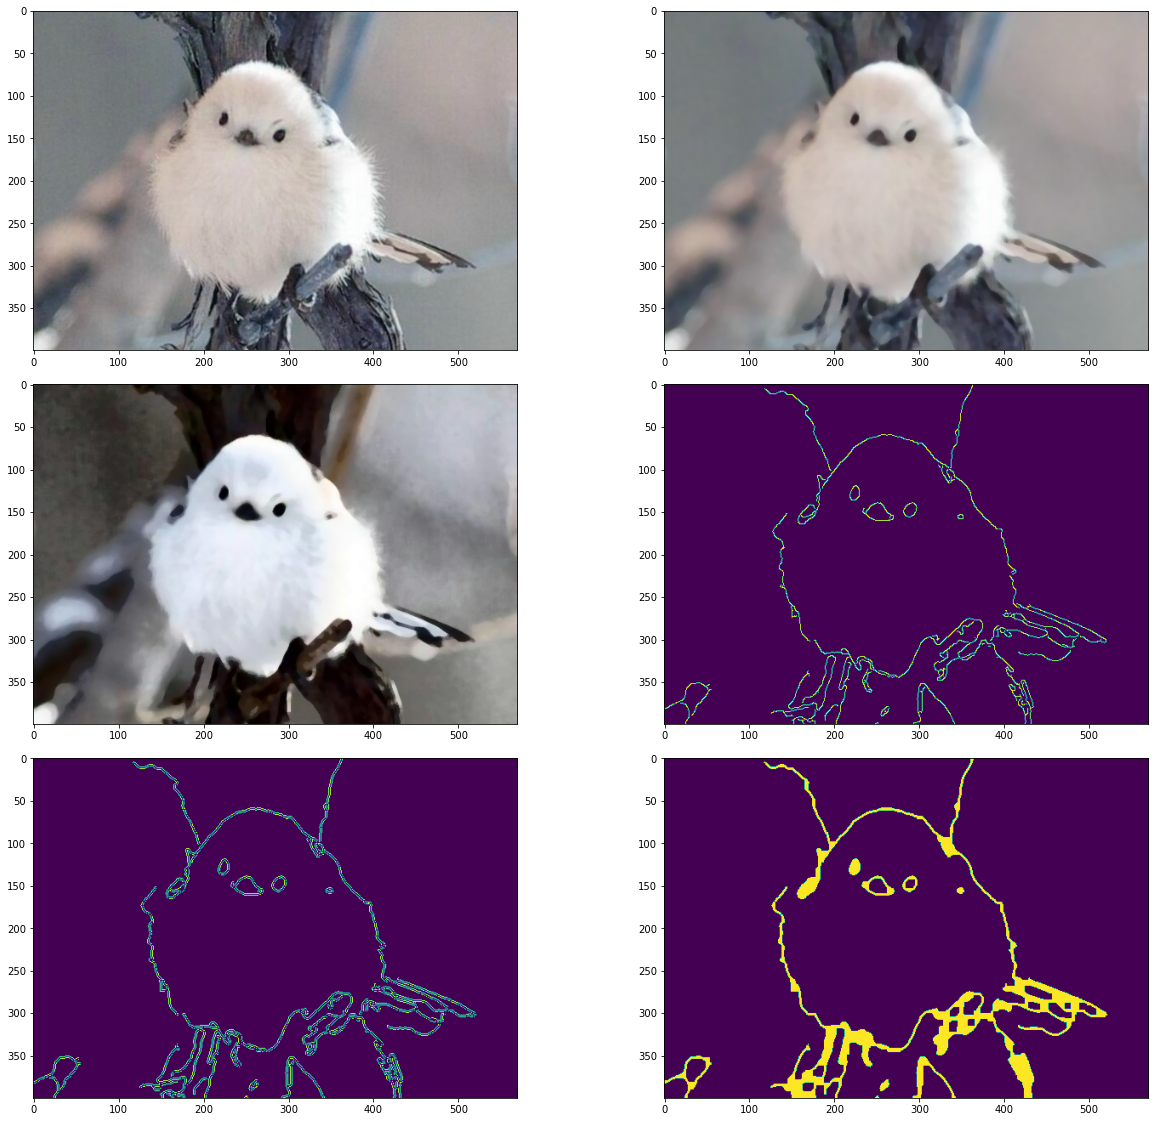

In [56]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)
gaussian = GaussianBlur(enhanced_median,1)
edged = cv2.Canny(gaussian, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)


f, axes = plt.subplots(3, 2)
f.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)

axes[0,0].imshow(origin)
axes[0,1].imshow(median)
axes[1,0].imshow(enhanced_median)
axes[1,1].imshow(gaussian)
axes[2,0].imshow(edged)
axes[2,1].imshow(closed)




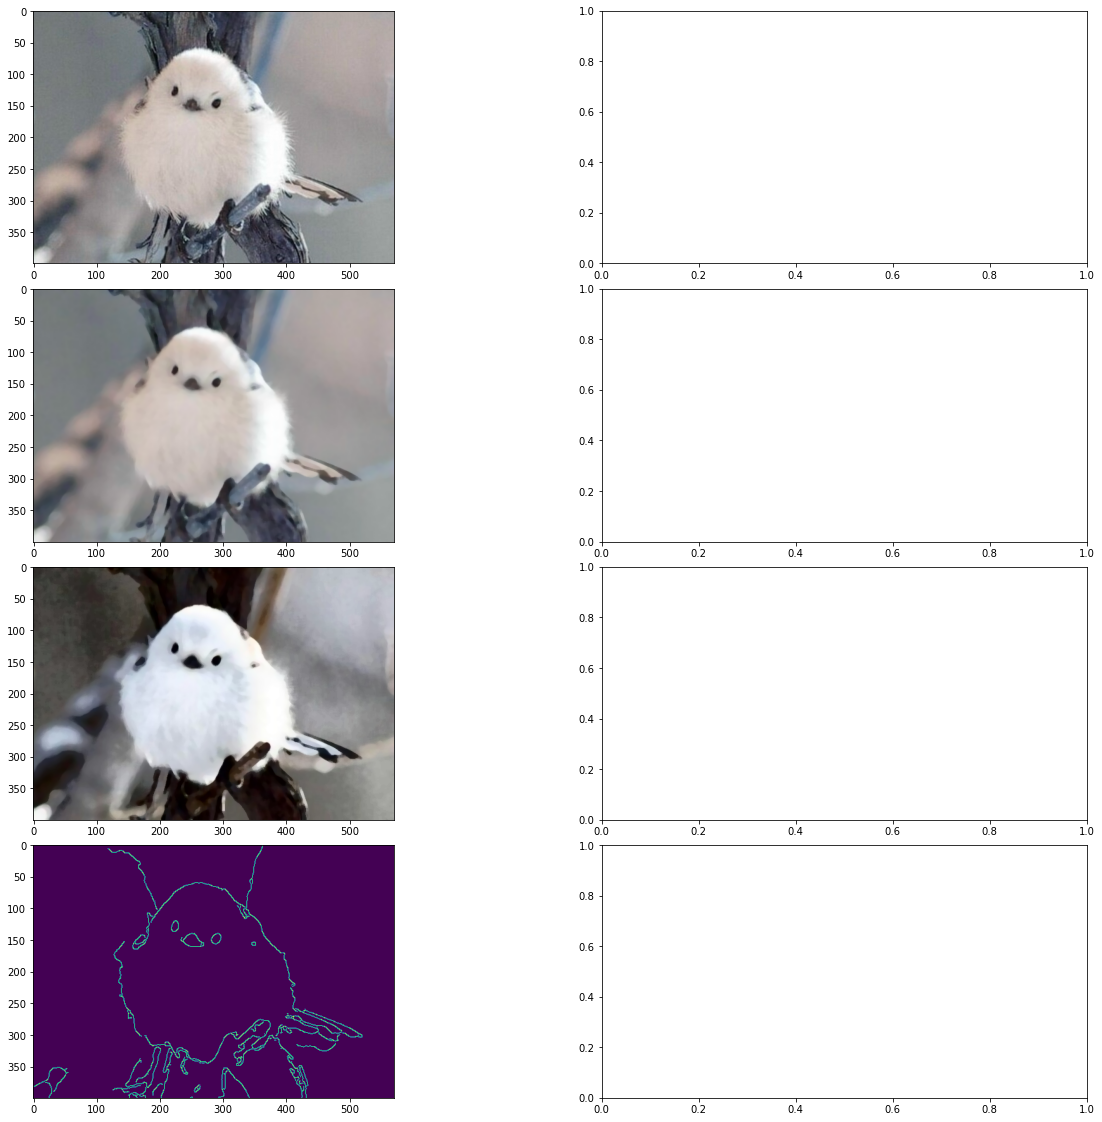

In [46]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
median_sq = median.copy()
median_sq = median_sq ** (median_sq/2)

# 이미지 전체 히스토그램균일화
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
enhanced_median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)



f, axes = plt.subplots(4, 2)
f.set_size_inches((20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.1)



axes[0,0].imshow(origin)
axes[1,0].imshow(median)
axes[2,0].imshow(enhanced_median)
axes[3,0].imshow(GaussianBlur(enhanced_median,1))






# axes[0,1].imshow(origin)
# axes[1,1].imshow(median_sq)
# # axes[3,1].imshow(GaussianBlur(median_sq,1))

# axes[2,1].imshow(enhanced_bilateral)
# axes[3,1].imshow(GaussianBlur(enhanced_bilateral,1))




plt.show()
### 전체 균일화가 성능이 가장 좋아보임

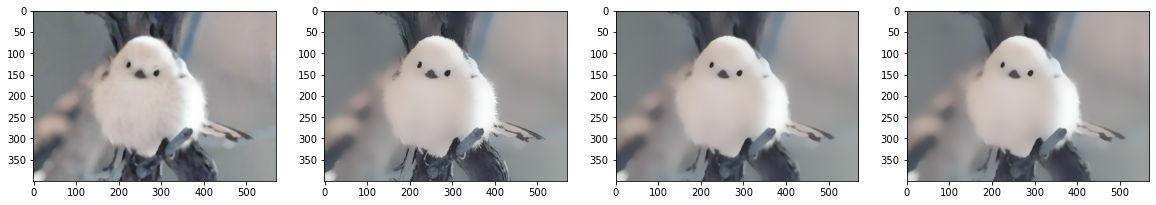

In [52]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
median = cv2.medianBlur(origin,7)
bilateral = cv2.bilateralFilter(origin,40,80,80)

M_B = cv2.medianBlur(bilateral,7)
B_M = cv2.bilateralFilter(median,40,80,80)


f,ax = plt.subplots(1,4)
f.set_size_inches((20, 5))
ax[0].imshow(median)
ax[1].imshow(bilateral)
ax[2].imshow(M_B)
ax[3].imshow(B_M)

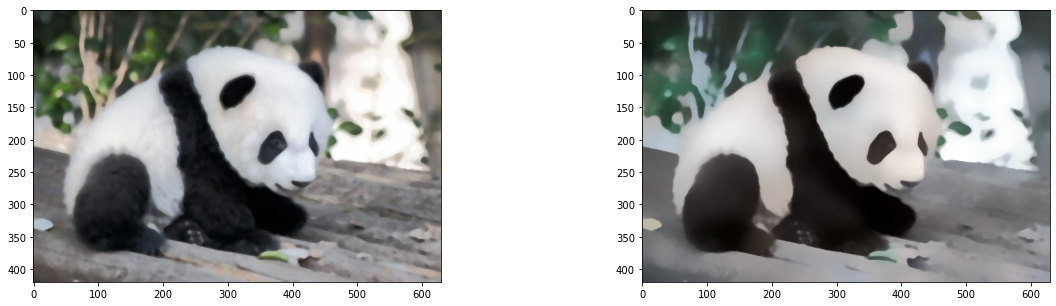

In [51]:
median = cv2.medianBlur(origin,7)
enhanced_yuv = cv2.cvtColor(median, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
median = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)

M_B = cv2.bilateralFilter(median,40,80,80)
enhanced_yuv = cv2.cvtColor(M_B, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
M_B = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)




f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(median)
ax[1].imshow(M_B)

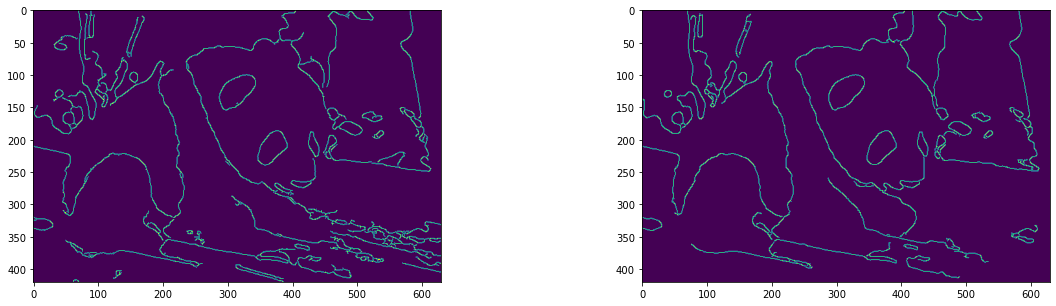

In [52]:
f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(GaussianBlur(median,1))
ax[1].imshow(GaussianBlur(M_B,1))

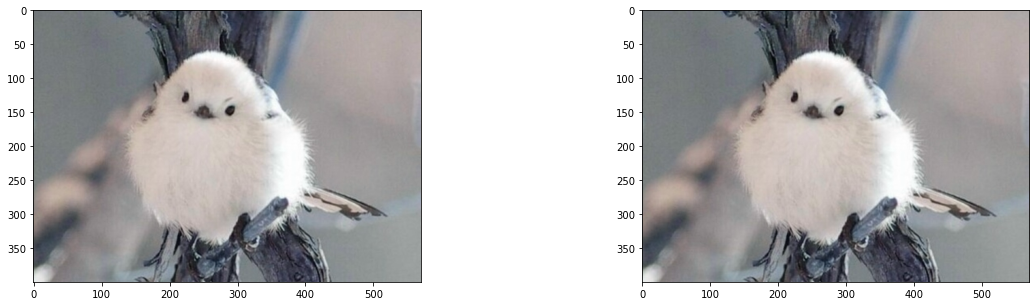

In [66]:

pil_image=Image.fromarray(cv2.cvtColor(origin, cv2.COLOR_BGR2RGB))



numpy_image=np.array(pil_image)


opencv_image=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)




f,ax = plt.subplots(1,2)
f.set_size_inches((20, 5))
ax[0].imshow(origin)
ax[1].imshow(opencv_image)

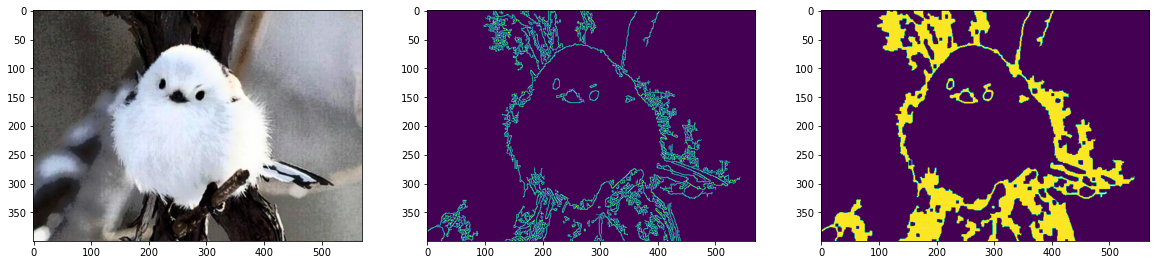

In [60]:
temp = origin.copy()
temp = temp**1.9999999999999
img_s = temp/(np.max(temp)/255)
img_s = img_s.astype(np.uint8)

enhanced_yuv = cv2.cvtColor(img_s, cv2.COLOR_BGR2YUV)
enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
final = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)
gaussian = GaussianBlur(final,1)


edged = cv2.Canny(gaussian, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)


f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(final)
ax[1].imshow(gaussian)
ax[2].imshow(closed)


# median = cv2.medianBlur(img_s,7)
# bilateral = cv2.bilateralFilter(img_s,40,80,80)

# M_B = cv2.medianBlur(bilateral,7)
# B_M = cv2.bilateralFilter(median,40,80,80)


# f,ax = plt.subplots(2,2)
# f.set_size_inches((20, 10))
# ax[0,0].imshow(median)
# ax[0,1].imshow(bilateral)
# ax[1,0].imshow(GaussianBlur(median,1))
# ax[1,1].imshow(GaussianBlur(bilateral,1))

In [ ]:


def image_square(temp):
    temp = temp**1.9999999999999
    img_s = temp/(np.max(temp)/255)
    return img_s.astype(np.uint8)


def image_enhanced(temp):
    enhanced_yuv = cv2.cvtColor(temp, cv2.COLOR_BGR2YUV)
    enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
    return cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)


def gray_enhanced(temp):
    enhanced_yuv = cv2.cvtColor(temp, cv2.COLOR_BGR2YUV)
    enhanced_yuv[:, :, 0] = cv2.equalizeHist(enhanced_yuv[:, :, 0])
    return cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2RGB)



def Beta_1(img):
    median =  cv2.medianBlur(img,1)
    BES = cv2.bilateralFilter(image_enhanced(image_square(img)),20,80,80)
    Gau = GaussianBlur(BES,1)
    return(img,BES,Gau)
#     f,ax = plt.subplots(1,3)
#     f.set_size_inches((20, 10))
#     ax[0].imshow(img)
#     ax[1].imshow(BES)
#     ax[2].imshow(Gau)




def Beta_2(img):
    median =  cv2.medianBlur(img,1)
    ES = image_enhanced(image_square(img))
    Gau = GaussianBlur(ES,1)
    return(img,ES,Gau)
#     f,ax = plt.subplots(1,3)
#     f.set_size_inches((20, 10))
#     ax[0].imshow(img)
#     ax[1].imshow(BES)
#     ax[2].imshow(Gau)







origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/QuteBird.jpg')
gray =  cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)


t = Beta_1(origin)

f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])


t = Beta_1(gray)

f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])



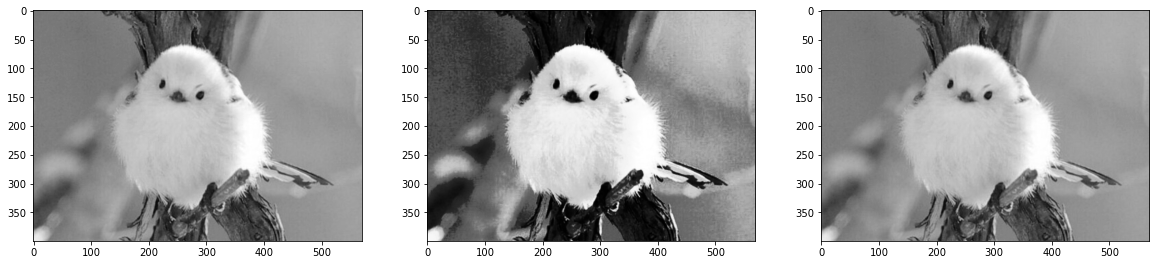

In [24]:
gray = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
gray_hist= cv2.equalizeHist(gray)
gray_norm = cv2.normalize(gray,None,0,255,cv2.NORM_MINMAX)

f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))

ax[0].imshow(gray,cmap='gray')
ax[1].imshow(gray_hist,cmap='gray')
ax[2].imshow(gray_norm,cmap='gray')

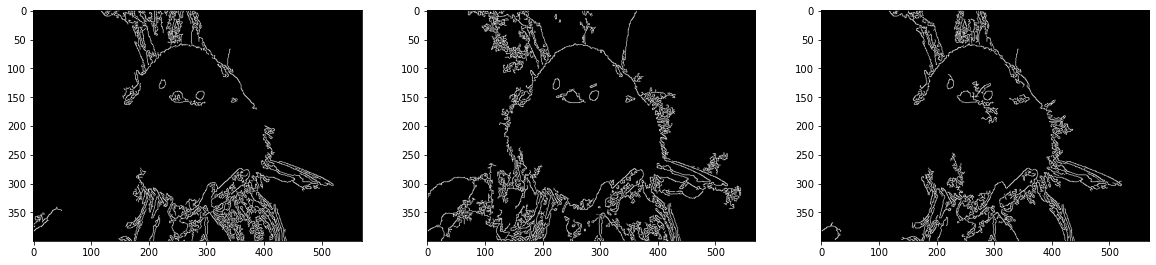

In [31]:
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))

ax[0].imshow(GaussianBlur(gray,1),cmap='gray')
ax[1].imshow(GaussianBlur(gray_hist,1),cmap='gray')
gray = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
gray_hist= cv2.equalizeHist(gray)ax[2].imshow(GaussianBlur(image_square(gray_norm),1),cmap='gray')

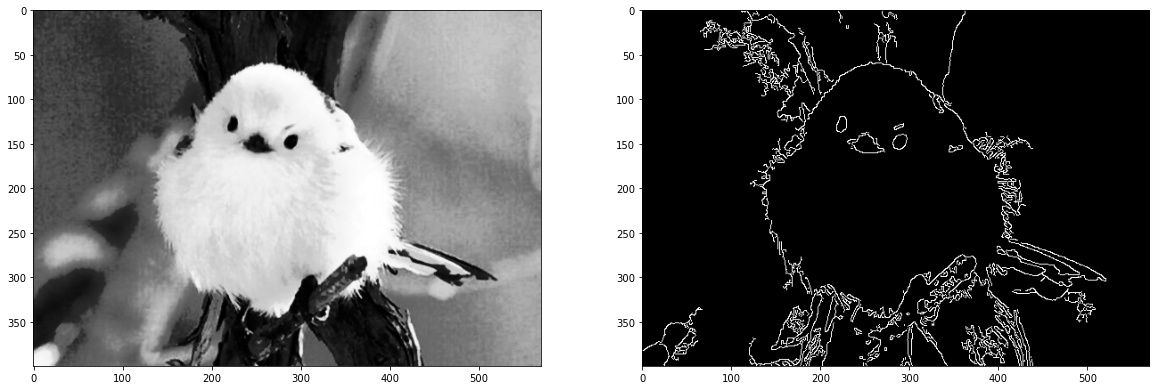

In [45]:
gray = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(gray,1,10,10)
median = cv2.medianBlur(gray,3)
gray_hist= cv2.equalizeHist(bilateral)

f,ax = plt.subplots(1,2)
f.set_size_inches((20, 10))

ax[0].imshow(gray_hist,cmap='gray')
ax[1].imshow(GaussianBlur(gray_hist,1),cmap='gray')


In [46]:
cv2.imwrite('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/test_0905.jpg',GaussianBlur(gray_hist,1))

True

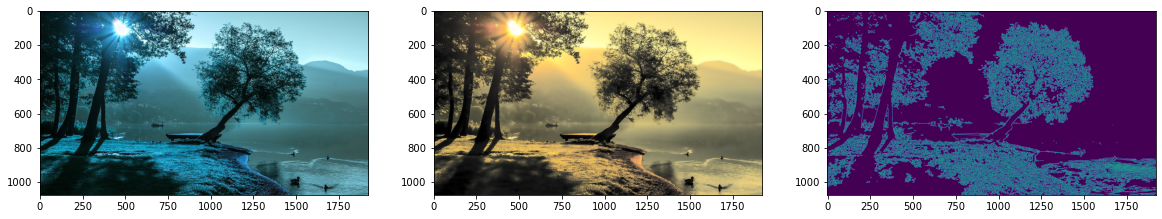

In [13]:
t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/tree.jpg',cv2.COLOR_BGR2RGB))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0],cmap='gray')
ax[1].imshow(t[1])
ax[2].imshow(t[2])

True

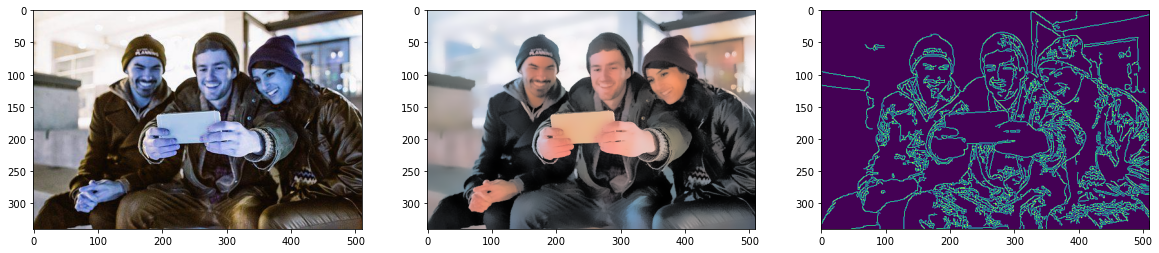

In [198]:

t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])
cv2.imwrite('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_1_Analysis.jpg',t[2])

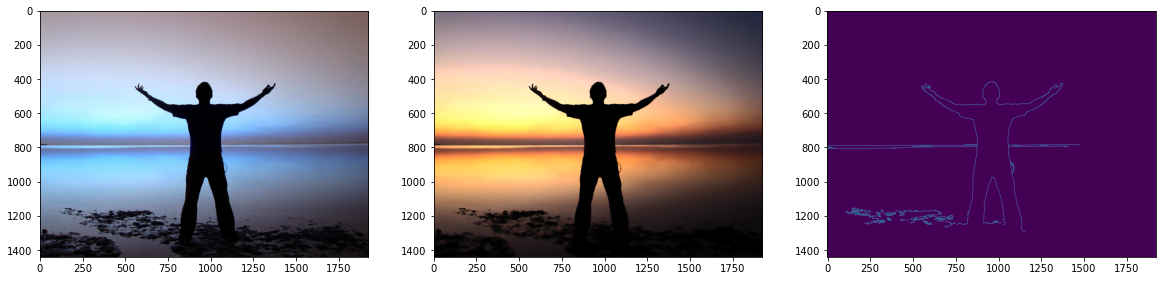

In [199]:


t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/self_2.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])

True

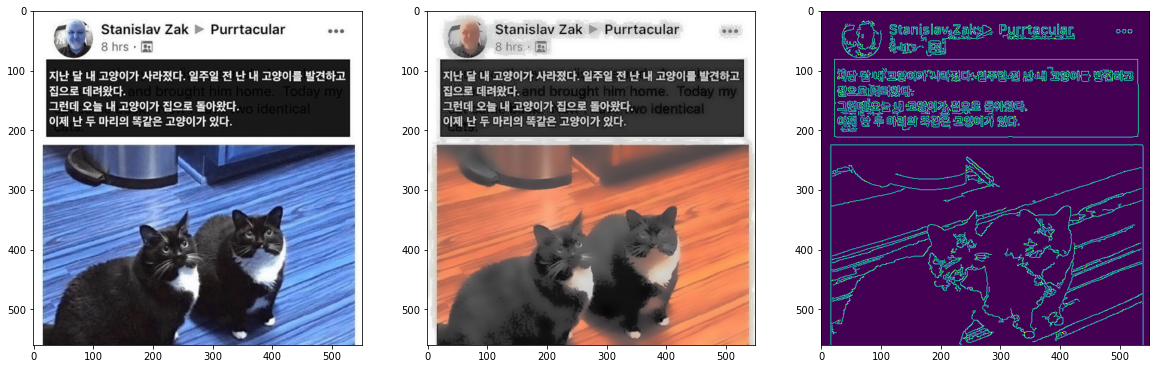

In [202]:
t = Beta_1(cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/cat_1.jpg'))
f,ax = plt.subplots(1,3)
f.set_size_inches((20, 10))
ax[0].imshow(t[0])
ax[1].imshow(t[1])
ax[2].imshow(t[2])
cv2.imwrite('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/cat_1_Analysis.jpg',t[2])

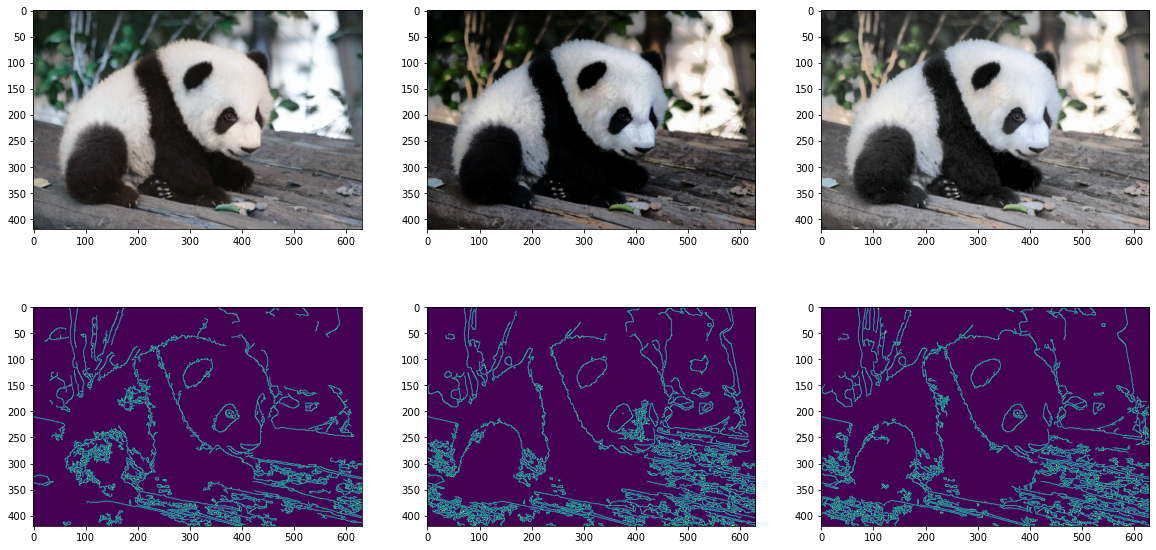

In [227]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
f,ax = plt.subplots(2,3)
f.set_size_inches((20, 10))
ax[0,0].imshow(origin)
ax[0,1].imshow(image_square(image_enhanced(origin)))
ax[0,2].imshow(image_enhanced(image_square(origin)))

ax[1,0].imshow(GaussianBlur(origin,1))
ax[1,1].imshow(GaussianBlur(image_square(image_enhanced(origin)),1))
ax[1,2].imshow(GaussianBlur(image_enhanced(image_square(origin)),1))



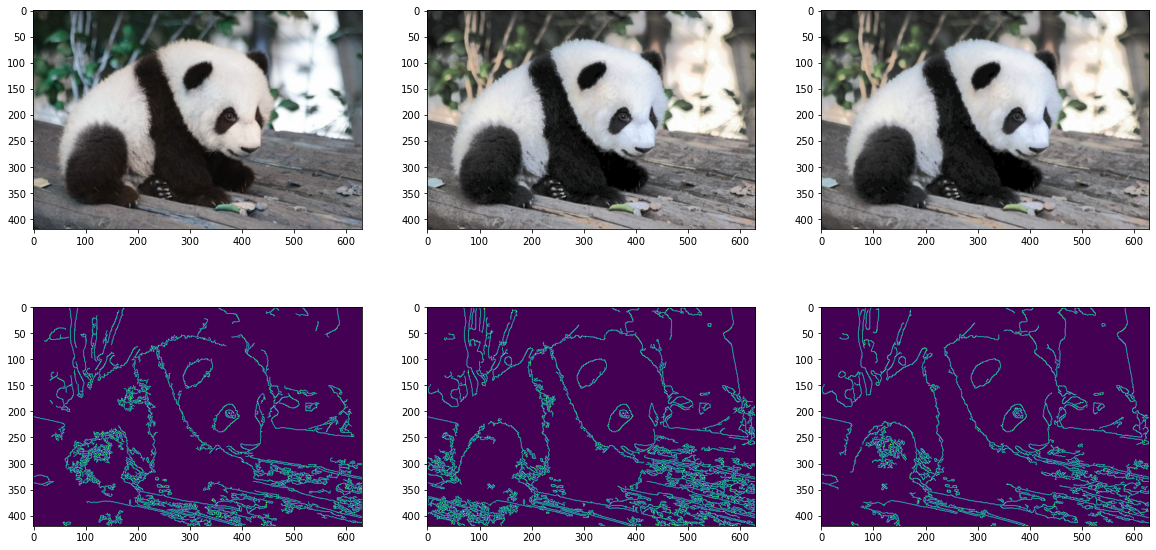

In [47]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
f,ax = plt.subplots(2,3)
f.set_size_inches((20, 10))

x = image_enhanced(cv2.medianBlur(image_square(origin),3))

ax[0,0].imshow(origin)
ax[0,1].imshow(image_enhanced(image_square(origin)))
ax[0,2].imshow(x)


ax[1,0].imshow(GaussianBlur(origin,1))
ax[1,1].imshow(GaussianBlur(image_enhanced(image_square(origin)),1))
ax[1,2].imshow(GaussianBlur(x,1))


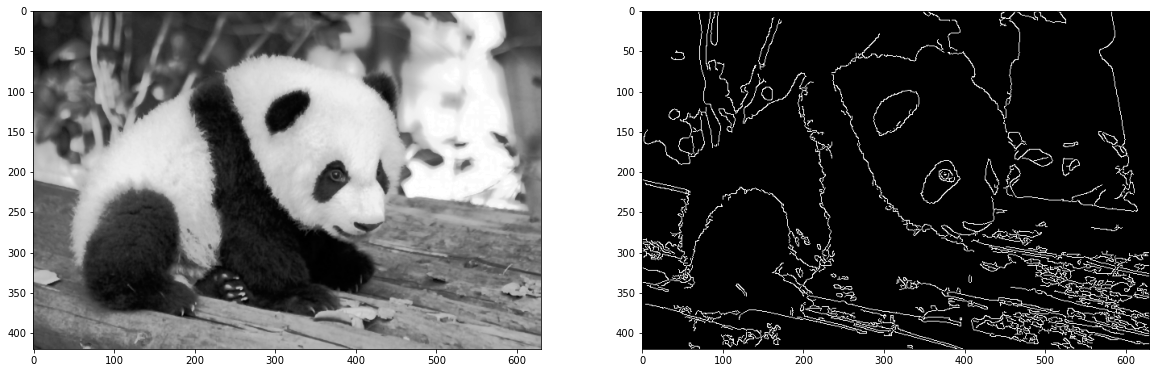

In [49]:
origin = cv2.imread('C:/Users/admin/Desktop/ImageAnalysis/Test_Image/panda.jpg')
gray = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)
bilateral = cv2.bilateralFilter(gray,1,10,10)
median = cv2.medianBlur(gray,3)
gray_hist= cv2.equalizeHist(bilateral)

f,ax = plt.subplots(1,2)
f.set_size_inches((20, 10))

ax[0].imshow(gray_hist,cmap='gray')
ax[1].imshow(GaussianBlur(gray_hist,1),cmap='gray')
